# Sarthak Bathla ( 04114803121 ) Decision Trees Lab

## Q1)  DECISION TREE USING SKLEARN LIBRARY

In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [6]:
# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

### Decision tree with Gini index

In [7]:
# Using DecisionTreeClassifier with Gini index
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X, y)

DecisionTreeClassifier()

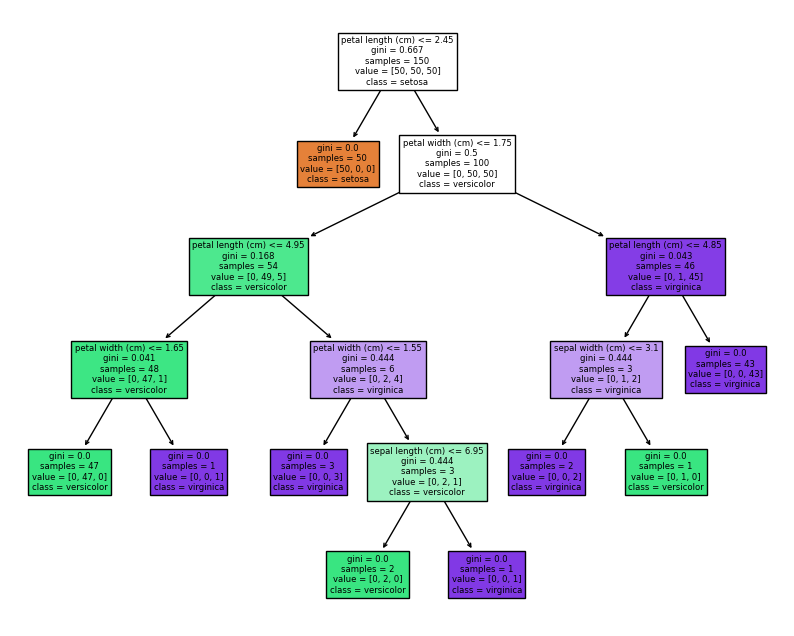

In [8]:
# Visualizing the decision tree with Gini index
plt.figure(figsize=(10,8))
plot_tree(clf_gini, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

### Decision tree with entropy

In [9]:
# Using DecisionTreeClassifier with entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

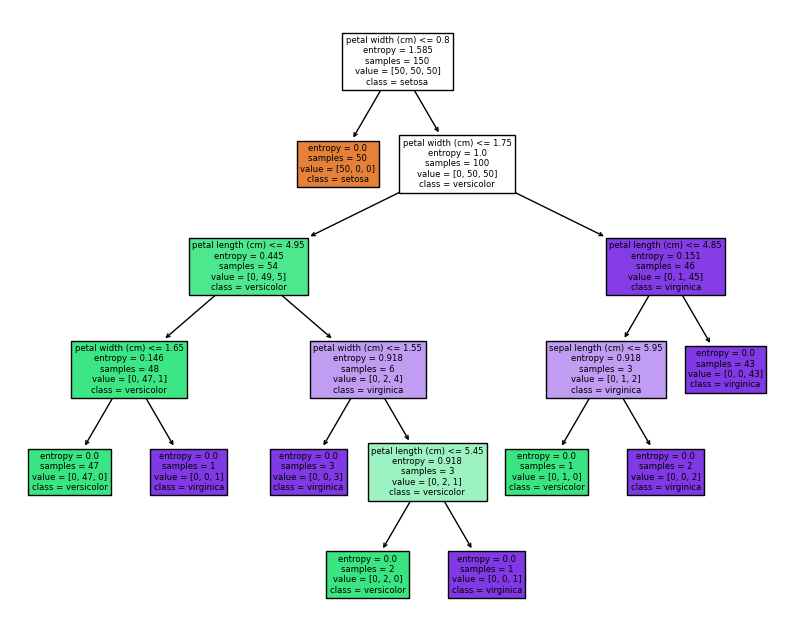

In [10]:
# Visualizing the decision tree with entropy
plt.figure(figsize=(10,8))
plot_tree(clf_entropy, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

## Q2) DECISION TREE WITHOUT LIBRARY

In [11]:
import pandas as pd
import numpy as np

In [12]:
# Create a sample dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal'],
    'Windy': [False, True, False, False, False, True, True, False, False, False],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes']
}

df = pd.DataFrame(data)
df.head()

,Outlook,Temperature,Humidity,Windy,PlayTennis
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rain,Mild,High,False,Yes
4,Rain,Cool,Normal,False,Yes


In [13]:
# Define entropy calculation function
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_val = np.sum([(-counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(elements))])
    return entropy_val

In [14]:
# Define information gain calculation function
def information_gain(data, split_attribute_name, target_name):
    # Calculate total entropy
    total_entropy = entropy(data[target_name])

    # Calculate the values and the corresponding counts for the split attribute
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)

    # Calculate the weighted entropy
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(data.where(data[split_attribute_name] == vals[i]).dropna()[target_name]) for i in range(len(vals))])

    # Calculate information gain
    information_gain_val = total_entropy - weighted_entropy
    return information_gain_val

In [15]:
# Determine the root node based on information gain
def find_root(data, target_name):
    # Get the list of attributes
    attributes = list(data.columns)
    attributes.remove(target_name)

    # Calculate information gain for each attribute
    gains = [information_gain(data, attribute, target_name) for attribute in attributes]

    # Determine the attribute with the highest information gain
    root_attribute = attributes[np.argmax(gains)]
    return root_attribute

In [16]:

# Build the decision tree recursively
def build_tree(data, target_name, tree=None):
    root_attribute = find_root(data, target_name)

    # Get distinct values of the root attribute
    vals = np.unique(data[root_attribute])

    # Create a dictionary to store the tree structure
    if tree is None:
        tree = {}
        tree[root_attribute] = {}

    # Split the dataset and recursively build subtrees
    for val in vals:
        sub_data = data.where(data[root_attribute] == val).dropna()
        unique_labels = np.unique(sub_data[target_name])

        if len(unique_labels) == 1:
            tree[root_attribute][val] = unique_labels[0]
        else:
            tree[root_attribute][val] = build_tree(sub_data, target_name)

    return tree

In [17]:
# Build the decision tree

decision_tree = build_tree(df, 'PlayTennis')

In [18]:
# Print the decision tree
import pprint
pprint.pprint(decision_tree)

{'Outlook': {'Overcast': 'Yes',
             'Rain': {'Windy': {False: 'Yes', True: 'No'}},
             'Sunny': {'Temperature': {'Cool': 'Yes',
                                       'Hot': 'No',
                                       'Mild': 'No'}}}}


# Q3) Show how decision trees can be used for both classification and regression using a program with sample dataset. Also visualize the decision tree obtained

## Implementing classification using decision tree on iris dataset

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)  # Adjust max_depth for visualization, higher depth might lead to overfitting

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred))




Accuracy: 1.0
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


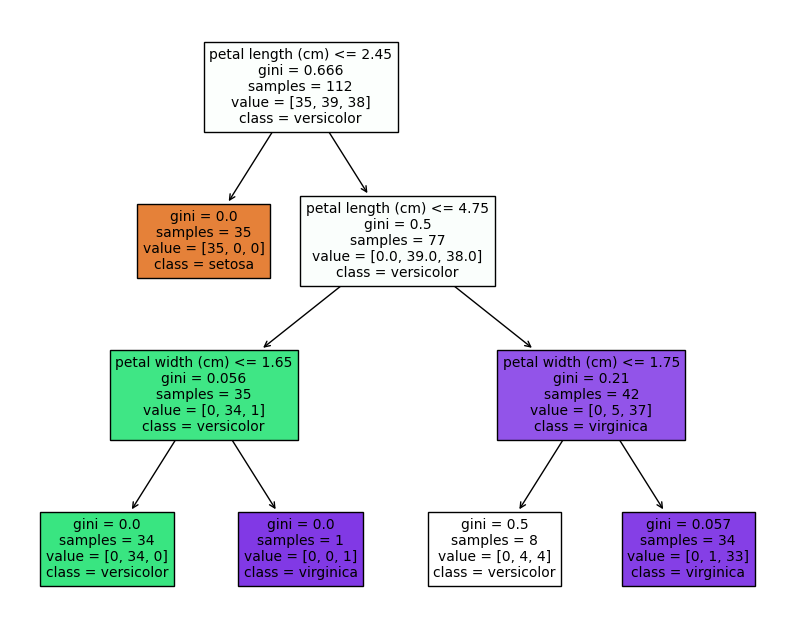

In [20]:
plt.figure(figsize=(10,8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

## Implementing regression using decision tree on boston dataset

In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml

# Download the California housing dataset
boston = fetch_openml(name="boston", version=1)
X = boston.data
y = boston.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a decision tree regressor
reg = DecisionTreeRegressor(max_depth=3)  # Adjust max_depth for visualization

# Train the model
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 15.689675955317718
R-squared: 0.7759486516717701


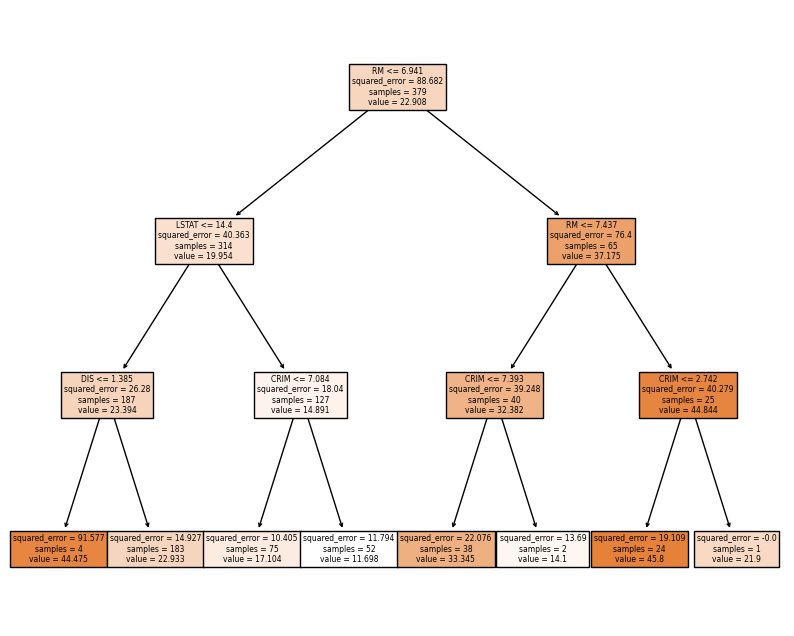

In [25]:
plt.figure(figsize=(10,8))
plot_tree(reg, filled=True, feature_names=boston.feature_names, class_names=boston.target_names)
plt.show()